In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score

In [2]:
#1

data = pd.DataFrame(pd.read_csv("База.csv", encoding='cp1251', sep=';'))

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5519 entries, 0 to 5518
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   УИД_Брони                      5519 non-null   object 
 1   ДатаБрони                      5519 non-null   object 
 2   ВремяБрони                     5519 non-null   object 
 3   ИсточникБрони                  5519 non-null   object 
 4   ВременнаяБронь                 5519 non-null   object 
 5   СледующийСтатус                5411 non-null   object 
 6   Город                          5512 non-null   object 
 7   ВидПомещения                   5427 non-null   object 
 8   Тип                            5320 non-null   object 
 9   ПродаваемаяПлощадь             5318 non-null   object 
 10  Этаж                           4771 non-null   float64
 11  СтоимостьНаДатуБрони           5519 non-null   object 
 12  ТипСтоимости                   5519 non-null   o

,УИД_Брони,ДатаБрони,ВремяБрони,ИсточникБрони,ВременнаяБронь,СледующийСтатус,Город,ВидПомещения,Тип,ПродаваемаяПлощадь,...,СтоимостьНаДатуБрони,ТипСтоимости,ВариантОплаты,ВариантОплатыДоп,СкидкаНаКвартиру,ФактическаяСтоимостьПомещения,СделкаАН,ИнвестиционныйПродукт,Привилегия,Статус лида (из CRM)
0,d192173f-fc14-11eb-9512-000c29ad50ac,13.08.2021,1:00:01,ручная,Да,Свободна,Ярославль,жилые помещения,"2,5к",72,...,4296100,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4296100,Нет,Нет,Нет,S
1,43574a1f-fe8b-11eb-9512-000c29ad50ac,16.08.2021,4:12:46,ручная,Да,Свободна,Ярославль,жилые помещения,"3,5к","79,8",...,5279600,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,5279600,Да,Нет,Нет,F
2,0e7b7a81-fe97-11eb-9512-000c29ad50ac,16.08.2021,5:37:12,ручная,Да,Свободна,Ярославль,жилые помещения,"2,5к","65,4",...,4201400,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4201400,Нет,Нет,Нет,S
3,c7041428-f90b-11eb-9512-000c29ad50ac,09.08.2021,4:17:35,ручная,Да,Свободна,Тюмень,жилые помещения,"2,5к","61,6",...,5414500,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,5414500,Нет,Нет,Нет,S
4,60090518-fe8b-11eb-9512-000c29ad50ac,16.08.2021,4:13:35,ручная,Да,Свободна,Ярославль,жилые помещения,"2,5к","65,4",...,4201400,Стоимость при 100% оплате,Единовременная оплата,NaN,NaN,4201400,Нет,Нет,Нет,P


In [3]:
#2

room_type_mask = data['ВидПомещения'] == 'жилые помещения'
data = data[room_type_mask]

final_statuses = ['Продана', 'Свободна']
data = data[data['СледующийСтатус'].isin(final_statuses)]

data['СледующийСтатус'] = data['СледующийСтатус'].replace({'Продана':1, 'Свободна':0})

data_next_condtition = data['СледующийСтатус'].copy()

data.drop(['УИД_Брони', 'ВидПомещения', 'СледующийСтатус'], axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 0 to 5518
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ДатаБрони                      3944 non-null   object 
 1   ВремяБрони                     3944 non-null   object 
 2   ИсточникБрони                  3944 non-null   object 
 3   ВременнаяБронь                 3944 non-null   object 
 4   Город                          3944 non-null   object 
 5   Тип                            3900 non-null   object 
 6   ПродаваемаяПлощадь             3900 non-null   object 
 7   Этаж                           3944 non-null   float64
 8   СтоимостьНаДатуБрони           3944 non-null   object 
 9   ТипСтоимости                   3944 non-null   object 
 10  ВариантОплаты                  3941 non-null   object 
 11  ВариантОплатыДоп               2218 non-null   object 
 12  СкидкаНаКвартиру               698 non-null    object

C:\Users\user20\AppData\Local\Temp\ipykernel_11352\2037177477.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['СледующийСтатус'] = data['СледующийСтатус'].replace({'Продана':1, 'Свободна':0})


In [4]:
#3-4

numeric_cols = [
    'ПродаваемаяПлощадь', 'Этаж', 'СтоимостьНаДатуБрони', 
    'СкидкаНаКвартиру', 'ФактическаяСтоимостьПомещения', 'Тип'
]
for col in numeric_cols:
    if data[col].dtype == 'object':
        if col == 'Тип':
            data[col] = data[col].str.replace('к', '', regex=False)
        data[col] = data[col].str.replace(',', '.', regex=False)
    
    data[col] = pd.to_numeric(data[col], errors='coerce')

binary_cols_map = {
    'ВременнаяБронь': {'Да': 1, 'Нет': 0},
    'СделкаАН': {'Да': 1, 'Нет': 0},
    'ИнвестиционныйПродукт': {'Да': 1, 'Нет': 0},
    'Привилегия': {'Да': 1, 'Нет': 0}
}
for col, mapping in binary_cols_map.items():
    data[col] = data[col].replace(mapping)

data['ИсточникБрони'] = data['ИсточникБрони'].replace({'ручная': 0, 'МП': 1})
data['ТипСтоимости'] = data['ТипСтоимости'].astype(str).str.contains('100%', na=False).astype(int)
data['ВариантОплаты'] = data['ВариантОплаты'].astype(str).str.contains('Единовременная', na=False).astype(int)

data = pd.get_dummies(data, columns=['Город', 'Статус лида (из CRM)'], drop_first=True, dtype=int)

data.drop(['ДатаБрони', 'ВремяБрони', 'ВариантОплатыДоп'], axis=1, inplace=True, errors='ignore')

for col in data.columns:
    if data[col].isnull().any():
        if pd.api.types.is_numeric_dtype(data[col]):
            median_val = data[col].median()
            data[col] = data[col].fillna(median_val)
            print(f"Числовой столбец '{col}': пропуски заменены медианой ({median_val:.2f})")

data.info()
data.head()

Числовой столбец 'Тип': пропуски заменены медианой (2.00)
Числовой столбец 'ПродаваемаяПлощадь': пропуски заменены медианой (60.50)
Числовой столбец 'СкидкаНаКвартиру': пропуски заменены медианой (111876.00)
<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 0 to 5518
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ИсточникБрони                  3944 non-null   int64  
 1   ВременнаяБронь                 3944 non-null   int64  
 2   Тип                            3944 non-null   float64
 3   ПродаваемаяПлощадь             3944 non-null   float64
 4   Этаж                           3944 non-null   float64
 5   СтоимостьНаДатуБрони           3944 non-null   float64
 6   ТипСтоимости                   3944 non-null   int64  
 7   ВариантОплаты                  3944 non-null   int64  
 8   СкидкаНаКвартиру               3944 non-null   float64
 9   ФактическаяСтоимостьПомещ

C:\Users\user20\AppData\Local\Temp\ipykernel_11352\2781909167.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace(mapping)
C:\Users\user20\AppData\Local\Temp\ipykernel_11352\2781909167.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ИсточникБрони'] = data['ИсточникБрони'].replace({'ручная': 0, 'МП': 1})


,ИсточникБрони,ВременнаяБронь,Тип,ПродаваемаяПлощадь,Этаж,СтоимостьНаДатуБрони,ТипСтоимости,ВариантОплаты,СкидкаНаКвартиру,ФактическаяСтоимостьПомещения,...,Город_Набережные Челны,Город_Пермь,Город_Сочи,Город_Тверь,Город_Тюмень,Город_Уфа,Город_Хабаровск,Город_Ярославль,Статус лида (из CRM)_P,Статус лида (из CRM)_S
0,0,1,2.5,72.0,3.0,4296100.0,1,1,111876.0,4296100.0,...,0,0,0,0,0,0,0,1,0,1
1,0,1,3.5,79.8,2.0,5279600.0,1,1,111876.0,5279600.0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,2.5,65.4,18.0,4201400.0,1,1,111876.0,4201400.0,...,0,0,0,0,0,0,0,1,0,1
3,0,1,2.5,61.6,12.0,5414500.0,1,1,111876.0,5414500.0,...,0,0,0,0,1,0,0,0,0,1
4,0,1,2.5,65.4,18.0,4201400.0,1,1,111876.0,4201400.0,...,0,0,0,0,0,0,0,1,1,0


In [5]:
#5
data['Цена за квадратный метр'] = data['ФактическаяСтоимостьПомещения']/data['ПродаваемаяПлощадь']
data['Скидка в процентах'] = (data['СкидкаНаКвартиру']/data['СтоимостьНаДатуБрони'])*100

data.info()
data['СкидкаНаКвартиру'].info()
data.head()


<class 'pandas.core.frame.DataFrame'>
Index: 3944 entries, 0 to 5518
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ИсточникБрони                  3944 non-null   int64  
 1   ВременнаяБронь                 3944 non-null   int64  
 2   Тип                            3944 non-null   float64
 3   ПродаваемаяПлощадь             3944 non-null   float64
 4   Этаж                           3944 non-null   float64
 5   СтоимостьНаДатуБрони           3944 non-null   float64
 6   ТипСтоимости                   3944 non-null   int64  
 7   ВариантОплаты                  3944 non-null   int64  
 8   СкидкаНаКвартиру               3944 non-null   float64
 9   ФактическаяСтоимостьПомещения  3944 non-null   float64
 10  СделкаАН                       3944 non-null   int64  
 11  ИнвестиционныйПродукт          3944 non-null   int64  
 12  Привилегия                     3944 non-null   int64 

,ИсточникБрони,ВременнаяБронь,Тип,ПродаваемаяПлощадь,Этаж,СтоимостьНаДатуБрони,ТипСтоимости,ВариантОплаты,СкидкаНаКвартиру,ФактическаяСтоимостьПомещения,...,Город_Сочи,Город_Тверь,Город_Тюмень,Город_Уфа,Город_Хабаровск,Город_Ярославль,Статус лида (из CRM)_P,Статус лида (из CRM)_S,Цена за квадратный метр,Скидка в процентах
0,0,1,2.5,72.0,3.0,4296100.0,1,1,111876.0,4296100.0,...,0,0,0,0,0,1,0,1,59668.055556,2.604129
1,0,1,3.5,79.8,2.0,5279600.0,1,1,111876.0,5279600.0,...,0,0,0,0,0,1,0,0,66160.401003,2.119024
2,0,1,2.5,65.4,18.0,4201400.0,1,1,111876.0,4201400.0,...,0,0,0,0,0,1,0,1,64241.590214,2.662827
3,0,1,2.5,61.6,12.0,5414500.0,1,1,111876.0,5414500.0,...,0,0,1,0,0,0,0,1,87897.727273,2.066230
4,0,1,2.5,65.4,18.0,4201400.0,1,1,111876.0,4201400.0,...,0,0,0,0,0,1,1,0,64241.590214,2.662827


In [6]:
#6-7

scaler = MinMaxScaler()
y = data_next_condtition
X = data

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled['СкидкаНаКвартиру'] = (X_scaled['СкидкаНаКвартиру'] - 0.5)

print(f"Баланс классов: \n{y.value_counts(normalize=True)}")

Баланс классов: 
СледующийСтатус
0    0.710953
1    0.289047
Name: proportion, dtype: float64


In [7]:
# 8. Сформируйте список факторных признаков и целевой признак
# X_scaled и y уже определены ранее
print("Размерность признакового пространства:", X_scaled.shape)
print("Размерность целевой переменной:", y.shape)

# 9. Выполните разбиение датасета на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Обучающая выборка: {X_train.shape[0]} записей")
print(f"Тестовая выборка: {X_test.shape[0]} записей")

Размерность признакового пространства: (3944, 25)
Размерность целевой переменной: (3944,)
Обучающая выборка: 2760 записей
Тестовая выборка: 1184 записей


In [8]:
# 10. Обучите модель KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# 11. Обучите модель Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 12. Получите прогнозы
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

In [9]:
# 13. Посчитайте показатели качества
def calculate_metrics(y_true, y_pred, model_name, dataset_name):
    f1 = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    
    return {
        'Модель': model_name,
        'Выборка': dataset_name,
        'F1-мера': f1,
        'Precision': precision,
        'Recall': recall
    }

metrics_results = []

# KNN метрики
metrics_results.append(calculate_metrics(y_train, y_train_pred_knn, 'KNN', 'Обучающая'))
metrics_results.append(calculate_metrics(y_test, y_test_pred_knn, 'KNN', 'Тестовая'))

# Decision Tree метрики
metrics_results.append(calculate_metrics(y_train, y_train_pred_dt, 'Decision Tree', 'Обучающая'))
metrics_results.append(calculate_metrics(y_test, y_test_pred_dt, 'Decision Tree', 'Тестовая'))

# Создаем DataFrame для наглядного отображения метрик
metrics_df = pd.DataFrame(metrics_results)
print("Метрики качества моделей:")
print(metrics_df.to_string(index=False))

Метрики качества моделей:
       Модель   Выборка  F1-мера  Precision   Recall
          KNN Обучающая 0.757054   0.839695 0.689223
          KNN  Тестовая 0.677368   0.750890 0.616959
Decision Tree Обучающая 0.991788   1.000000 0.983709
Decision Tree  Тестовая 0.785075   0.801829 0.769006


In [12]:
# 14. Сделайте вывод о том, насколько хорошо удалось решить задачу прогнозирования

# Анализ результатов
print("\n1. Анализ баланса классов:")
print(f"   - Класс 0 (Свободна): {y.value_counts()[0]} записей ({y.value_counts(normalize=True)[0]:.1%})")
print(f"   - Класс 1 (Продана): {y.value_counts()[1]} записей ({y.value_counts(normalize=True)[1]:.1%})")
print("   Вывод: Датасет несбалансированный (соотношение примерно 71% к 29%)")

print("\n2. Сравнение моделей на тестовой выборке:")
test_knn = metrics_df[(metrics_df['Модель'] == 'KNN') & (metrics_df['Выборка'] == 'Тестовая')].iloc[0]
test_dt = metrics_df[(metrics_df['Модель'] == 'Decision Tree') & (metrics_df['Выборка'] == 'Тестовая')].iloc[0]

print(f"   KNN - F1: {test_knn['F1-мера']:.3f}, Precision: {test_knn['Precision']:.3f}, Recall: {test_knn['Recall']:.3f}")
print(f"   Decision Tree - F1: {test_dt['F1-мера']:.3f}, Precision: {test_dt['Precision']:.3f}, Recall: {test_dt['Recall']:.3f}")

if test_knn['F1-мера'] > test_dt['F1-мера']:
    print("   Лучшая модель по F1-мере: KNN")
else:
    print("   Лучшая модель по F1-мере: Decision Tree")

print("\n3. Интерпретация метрик для лучшей модели:")
best_model = 'KNN' if test_knn['F1-мера'] > test_dt['F1-мера'] else 'Decision Tree'
best_metrics = test_knn if best_model == 'KNN' else test_dt

print(f"   Precision ({best_metrics['Precision']:.3f}):")
print("   - Из всех предсказанных нами продаж правильно предсказаны {:.1%}".format(best_metrics['Precision']))
print("   - Это означает, что когда модель говорит 'будет продажа', она ошибается примерно в {:.1%} случаев".format(1 - best_metrics['Precision']))

print(f"\n   Recall ({best_metrics['Recall']:.3f}):")
print("   - Мы смогли выявить {:.1%} от всех реальных продаж".format(best_metrics['Recall']))
print("   - Это означает, что мы пропускаем примерно {:.1%} реальных продаж".format(1 - best_metrics['Recall']))

print(f"\n   F1-мера ({best_metrics['F1-мера']:.3f}):")
print("   - Гармоническое среднее между Precision и Recall")
print("   - Показывает общее качество модели с учетом дисбаланса классов")

print("\n4. Анализ переобучения:")
train_knn = metrics_df[(metrics_df['Модель'] == 'KNN') & (metrics_df['Выборка'] == 'Обучающая')].iloc[0]
train_dt = metrics_df[(metrics_df['Модель'] == 'Decision Tree') & (metrics_df['Выборка'] == 'Обучающая')].iloc[0]

knn_overfit = train_knn['F1-мера'] - test_knn['F1-мера']
dt_overfit = train_dt['F1-мера'] - test_dt['F1-мера']

print(f"   KNN: разница F1 между обучающей и тестовой выборками = {knn_overfit:.3f}")
print(f"   Decision Tree: разница F1 между обучающей и тестовой выборками = {dt_overfit:.3f}")

if abs(knn_overfit) > 0.1:
    print("   У KNN наблюдается переобучение")
if abs(dt_overfit) > 0.1:
    print("   У Decision Tree наблюдается сильное переобучение")

""" print("\n5. Практическая значимость результатов:")
print("   - Precision важен для минимизации ложных срабатываний (когда мы ожидаем продажу, а ее нет)")
print("   - Recall важен для выявления максимального количества реальных продаж")
print("   - В зависимости от бизнес-задачи можно настраивать баланс между этими метриками") """


1. Анализ баланса классов:
   - Класс 0 (Свободна): 2804 записей (71.1%)
   - Класс 1 (Продана): 1140 записей (28.9%)
   Вывод: Датасет несбалансированный (соотношение примерно 71% к 29%)

2. Сравнение моделей на тестовой выборке:
   KNN - F1: 0.677, Precision: 0.751, Recall: 0.617
   Decision Tree - F1: 0.785, Precision: 0.802, Recall: 0.769
   Лучшая модель по F1-мере: Decision Tree

3. Интерпретация метрик для лучшей модели:
   Precision (0.802):
   - Из всех предсказанных нами продаж правильно предсказаны 80.2%
   - Это означает, что когда модель говорит 'будет продажа', она ошибается примерно в 19.8% случаев

   Recall (0.769):
   - Мы смогли выявить 76.9% от всех реальных продаж
   - Это означает, что мы пропускаем примерно 23.1% реальных продаж

   F1-мера (0.785):
   - Гармоническое среднее между Precision и Recall
   - Показывает общее качество модели с учетом дисбаланса классов

4. Анализ переобучения:
   KNN: разница F1 между обучающей и тестовой выборками = 0.080
   Decisi

' print("\n5. Практическая значимость результатов:")\nprint("   - Precision важен для минимизации ложных срабатываний (когда мы ожидаем продажу, а ее нет)")\nprint("   - Recall важен для выявления максимального количества реальных продаж")\nprint("   - В зависимости от бизнес-задачи можно настраивать баланс между этими метриками") '

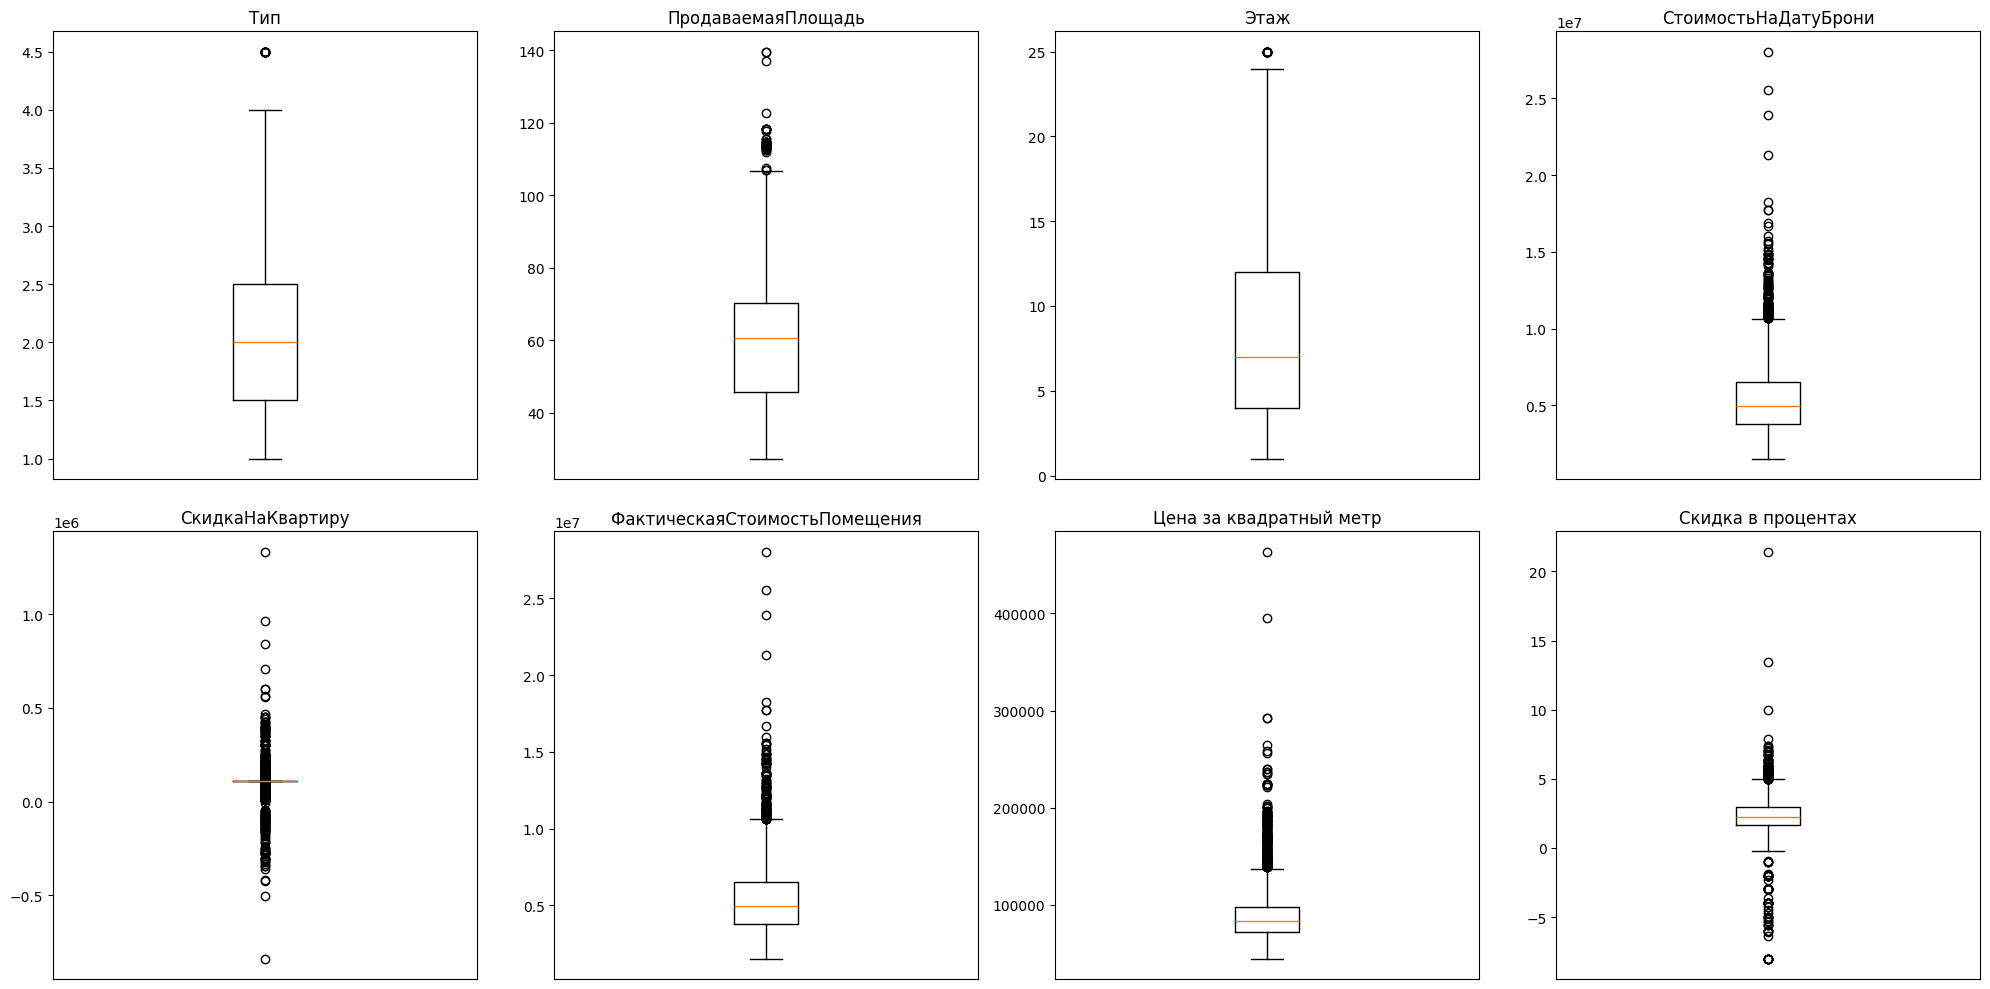

Метрики после удаления выбросов:
KNN - F1: 0.7472178060413355
Decision Tree - F1: 0.7690014903129657


In [13]:
# 15. Постройте boxplot для всех числовых признаков и удалите выбросы
# Выберем только числовые признаки (те, что не являются бинарными или one-hot encoded)
numeric_features = X.select_dtypes(include=['float64']).columns.tolist()

plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3, 4, i)
    plt.boxplot(X[feature].dropna())
    plt.title(feature)
    plt.xticks([])
plt.tight_layout()
plt.show()

# Удаление выбросов с помощью метода межквартильного размаха
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Заменяем выбросы на граничные значения
        df_clean[col] = df_clean[col].clip(lower_bound, upper_bound)
    
    return df_clean

X_clean = remove_outliers(X, numeric_features)

# Повторяем нормализацию для очищенных данных
scaler_clean = MinMaxScaler()
X_scaled_clean = pd.DataFrame(scaler_clean.fit_transform(X_clean), columns=X_clean.columns)
X_scaled_clean['СкидкаНаКвартиру'] = X_scaled_clean['СкидкаНаКвартиру'] - 0.5

# Разделение на train/test для очищенных данных
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(
    X_scaled_clean, y, test_size=0.3, random_state=42, stratify=y
)

# Обучение моделей на очищенных данных
knn_model_clean = KNeighborsClassifier()
knn_model_clean.fit(X_train_clean, y_train_clean)

dt_model_clean = DecisionTreeClassifier(random_state=42)
dt_model_clean.fit(X_train_clean, y_train_clean)

# Прогнозы и метрики для очищенных данных
y_pred_knn_clean = knn_model_clean.predict(X_test_clean)
y_pred_dt_clean = dt_model_clean.predict(X_test_clean)

print("Метрики после удаления выбросов:")
print("KNN - F1:", f1_score(y_test_clean, y_pred_knn_clean))
print("Decision Tree - F1:", f1_score(y_test_clean, y_pred_dt_clean))

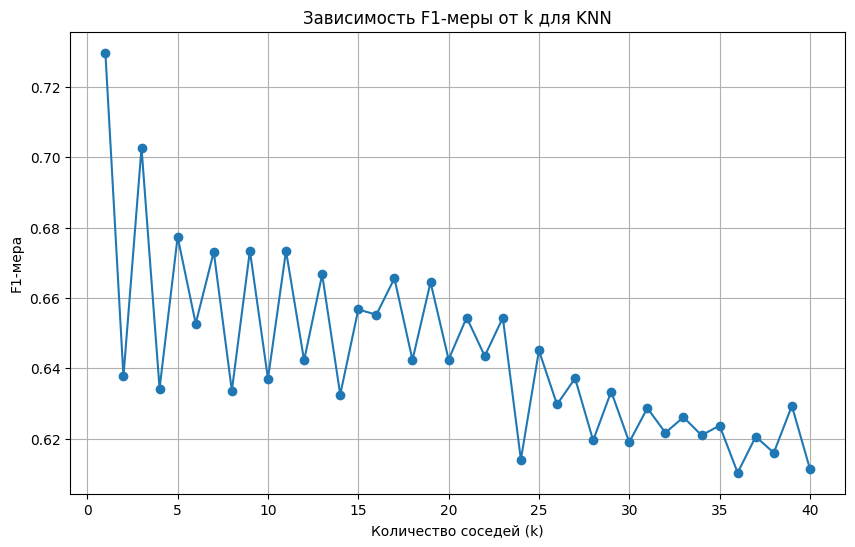

Оптимальное k для KNN: 1 (F1 = 0.730)


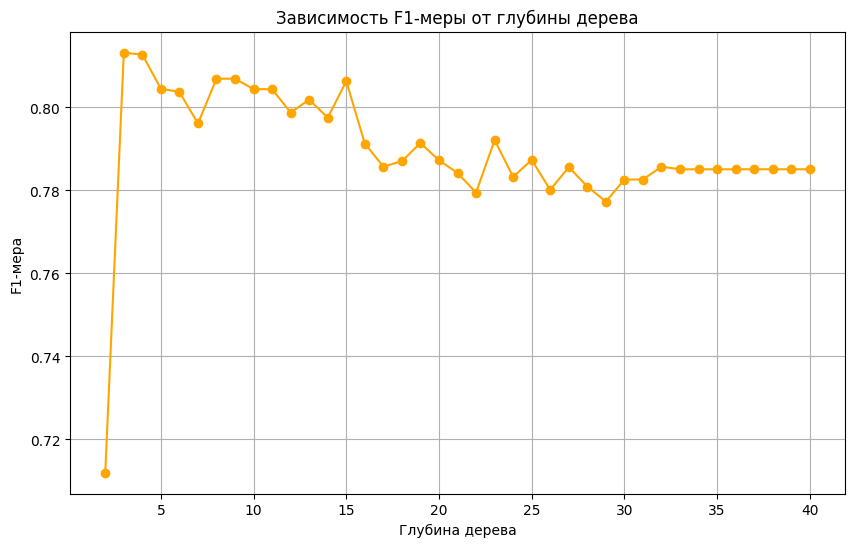

Оптимальная глубина для Decision Tree: 3 (F1 = 0.813)


In [ ]:
# 16. Подбор параметров для KNN и Decision Tree

# Подбор k для KNN
k_values = range(1, 41)
knn_f1_scores = []

for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    y_pred = knn_temp.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    knn_f1_scores.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_f1_scores, marker='o')
plt.xlabel('Количество соседей (k)')
plt.ylabel('F1-мера')
plt.title('Зависимость F1-меры от k для KNN')
plt.grid(True)
plt.show()

best_k = k_values[knn_f1_scores.index(max(knn_f1_scores))]
print(f"Оптимальное k для KNN: {best_k} (F1 = {max(knn_f1_scores):.3f})")

# Подбор глубины для Decision Tree
depth_values = range(2, 41)
dt_f1_scores = []

for depth in depth_values:
    dt_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_temp.fit(X_train, y_train)
    y_pred = dt_temp.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    dt_f1_scores.append(f1)

plt.figure(figsize=(10, 6))
plt.plot(depth_values, dt_f1_scores, marker='o', color='orange')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-мера')
plt.title('Зависимость F1-меры от глубины дерева')
plt.grid(True)
plt.show()

best_depth = depth_values[dt_f1_scores.index(max(dt_f1_scores))]
print(f"Оптимальная глубина для Decision Tree: {best_depth} (F1 = {max(dt_f1_scores):.3f})")

In [ ]:
# 17. Логистическая регрессия
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

print("Логистическая регрессия - метрики:")
print(classification_report(y_test, y_pred_lr))
print("F1-мера:", f1_score(y_test, y_pred_lr))

Логистическая регрессия - метрики:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       842
           1       0.87      0.55      0.68       342

    accuracy                           0.85      1184
   macro avg       0.85      0.76      0.79      1184
weighted avg       0.85      0.85      0.83      1184

F1-мера: 0.675


In [ ]:
# 18. SVM (LinearSVC)
svm_model = LinearSVC(random_state=42, max_iter=10000)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("SVM (LinearSVC) - метрики:")
print(classification_report(y_test, y_pred_svm))
print("F1-мера:", f1_score(y_test, y_pred_svm))

SVM (LinearSVC) - метрики:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       842
           1       0.88      0.57      0.69       342

    accuracy                           0.85      1184
   macro avg       0.86      0.77      0.80      1184
weighted avg       0.86      0.85      0.84      1184

F1-мера: 0.6938053097345133


In [17]:
# Сводная таблица сравнения всех моделей
models_summary = {
    'Модель': ['KNN (по умолчанию)', 'Decision Tree (по умолчанию)', 
               'KNN (оптимальный k)', 'Decision Tree (оптимальная глубина)',
               'Логистическая регрессия', 'SVM (LinearSVC)'],
    'F1-мера': [
        f1_score(y_test, y_test_pred_knn),
        f1_score(y_test, y_test_pred_dt),
        max(knn_f1_scores),
        max(dt_f1_scores),
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_svm)
    ],
    'Precision': [
        precision_score(y_test, y_test_pred_knn),
        precision_score(y_test, y_test_pred_dt),
        precision_score(y_test, KNeighborsClassifier(n_neighbors=best_k).fit(X_train, y_train).predict(X_test)),
        precision_score(y_test, DecisionTreeClassifier(max_depth=best_depth, random_state=42).fit(X_train, y_train).predict(X_test)),
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_svm)
    ],
    'Recall': [
        recall_score(y_test, y_test_pred_knn),
        recall_score(y_test, y_test_pred_dt),
        recall_score(y_test, KNeighborsClassifier(n_neighbors=best_k).fit(X_train, y_train).predict(X_test)),
        recall_score(y_test, DecisionTreeClassifier(max_depth=best_depth, random_state=42).fit(X_train, y_train).predict(X_test)),
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_svm)
    ]
}

summary_df = pd.DataFrame(models_summary)
print("\nСводная таблица сравнения всех моделей:")
print(summary_df.to_string(index=False))

# Определение лучшей модели
best_model_idx = summary_df['F1-мера'].idxmax()
print(f"\nЛучшая модель: {summary_df.loc[best_model_idx, 'Модель']}")
print(f"F1-мера лучшей модели: {summary_df.loc[best_model_idx, 'F1-мера']:.3f}")


Сводная таблица сравнения всех моделей:
                             Модель  F1-мера  Precision   Recall
                 KNN (по умолчанию) 0.677368   0.750890 0.616959
       Decision Tree (по умолчанию) 0.785075   0.801829 0.769006
                KNN (оптимальный k) 0.729730   0.750000 0.710526
Decision Tree (оптимальная глубина) 0.813187   0.877966 0.757310
            Логистическая регрессия 0.675000   0.866972 0.552632
                    SVM (LinearSVC) 0.693805   0.878924 0.573099

Лучшая модель: Decision Tree (оптимальная глубина)
F1-мера лучшей модели: 0.813
